In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df=df.drop('id',axis=1)

In [4]:
df.head()
df = df[df['smoking_status'] != 'Unknown']
df=df.dropna()


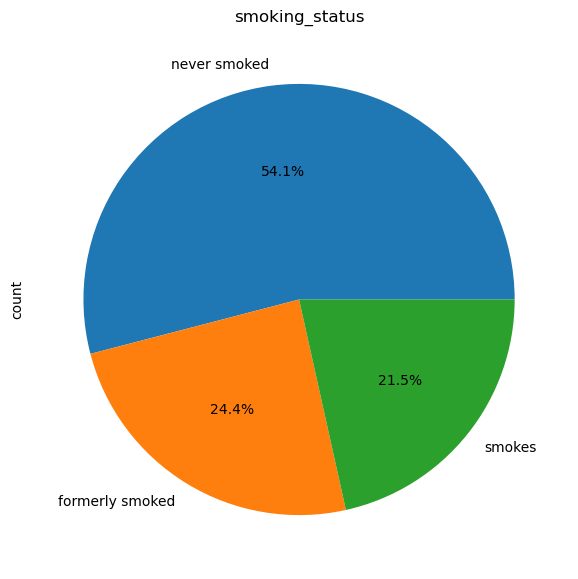

In [5]:
fig, axes = plt.subplots(figsize=(7, 7))
df['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('smoking_status')
plt.show()

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique())  
    print("="*40)

gender
['Male' 'Female' 'Other']
age
[67. 80. 49. 79. 81. 74. 69. 61. 54. 50. 64. 75. 60. 71. 52. 65. 57. 82.
 48. 72. 78. 76. 58. 39. 77. 63. 73. 56. 45. 70. 59. 66. 68. 47. 53. 38.
 55. 46. 32. 51. 37. 40. 35. 20. 42. 44. 25. 23. 27. 43. 30. 29. 21. 18.
 33. 24. 36. 41. 34. 26. 17. 31. 13. 22. 12. 62. 14. 28. 16. 15. 19. 11.
 10.]
hypertension
[0 1]
heart_disease
[1 0]
ever_married
['Yes' 'No']
work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type
['Urban' 'Rural']
avg_glucose_level
[228.69 105.92 171.23 ... 125.2   82.99 166.29]
bmi
[36.6 32.5 34.4 24.  29.  27.4 22.8 29.7 36.8 27.3 28.2 30.9 37.5 25.8
 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 22.2 30.5 26.5 33.7 23.1 29.9
 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8 40.4 25.3
 30.2 47.5 30.  28.9 28.1 31.1 21.7 27.  24.1 22.9 29.1 32.3 41.1 29.8
 26.3 29.4 24.4 28.  34.6 30.3 24.2 41.5 22.6 56.6 31.3 31.  31.7 35.8
 28.4 20.1 26.7 38.7 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 2

In [7]:
le= LabelEncoder()
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['gender']=le.fit_transform(df['gender'])


In [11]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=False)


df['bmi_bin'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=False)


df['glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=[0, 100, 140, 300], labels=False)

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique())  
    print("="*40)

gender
[1 0 2]
age
[67. 80. 49. 79. 81. 74. 69. 61. 54. 50. 64. 75. 60. 71. 52. 65. 57. 82.
 48. 72. 78. 76. 58. 39. 77. 63. 73. 56. 45. 70. 59. 66. 68. 47. 53. 38.
 55. 46. 32. 51. 37. 40. 35. 20. 42. 44. 25. 23. 27. 43. 30. 29. 21. 18.
 33. 24. 36. 41. 34. 26. 17. 31. 13. 22. 12. 62. 14. 28. 16. 15. 19. 11.
 10.]
hypertension
[0 1]
heart_disease
[1 0]
ever_married
[1 0]
work_type
[2 3 0 4 1]
Residence_type
[1 0]
avg_glucose_level
[228.69 105.92 171.23 ... 125.2   82.99 166.29]
bmi
[36.6 32.5 34.4 24.  29.  27.4 22.8 29.7 36.8 27.3 28.2 30.9 37.5 25.8
 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 22.2 30.5 26.5 33.7 23.1 29.9
 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8 40.4 25.3
 30.2 47.5 30.  28.9 28.1 31.1 21.7 27.  24.1 22.9 29.1 32.3 41.1 29.8
 26.3 29.4 24.4 28.  34.6 30.3 24.2 41.5 22.6 56.6 31.3 31.  31.7 35.8
 28.4 20.1 26.7 38.7 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 25.6
 36.9 37.3 45.7 34.2 23.6 22.3 37.1 45.  25.5 30.8 32.  37.4 34.5 27.9
 29.5 46.  42.5

In [13]:
df['work_type'].value_counts()

work_type
2    2201
3     629
0     514
4      68
1      14
Name: count, dtype: int64

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,bmi_bin,glucose_bin
0,1,67.0,0,1,1,2,1,228.69,36.6,formerly smoked,1,2,3,2
2,1,80.0,0,1,1,2,0,105.92,32.5,never smoked,1,2,3,1
3,0,49.0,0,0,1,2,1,171.23,34.4,smokes,1,1,3,2
4,0,79.0,1,0,1,3,0,174.12,24.0,never smoked,1,2,1,2
5,1,81.0,0,0,1,2,1,186.21,29.0,formerly smoked,1,2,2,2


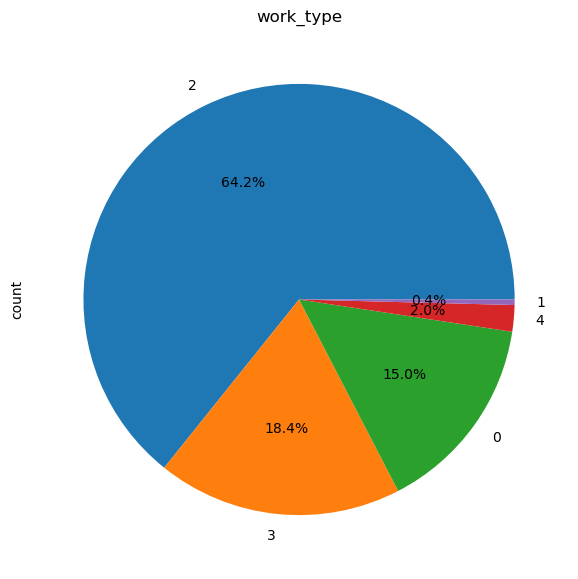

In [15]:
fig, axes = plt.subplots(figsize=(7, 7))
df['work_type'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('work_type')
plt.show()

In [ ]:
df.head()

In [16]:

df['smoking_status'] = df['smoking_status'].map({
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 1
})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,bmi_bin,glucose_bin
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,2,3,2
2,1,80.0,0,1,1,2,0,105.92,32.5,0,1,2,3,1
3,0,49.0,0,0,1,2,1,171.23,34.4,1,1,1,3,2
4,0,79.0,1,0,1,3,0,174.12,24.0,0,1,2,1,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1,2,2,2


In [17]:
for col in df.columns:
    print(col)
    print(df[col].unique())  
    print("="*40)

gender
[1 0 2]
age
[67. 80. 49. 79. 81. 74. 69. 61. 54. 50. 64. 75. 60. 71. 52. 65. 57. 82.
 48. 72. 78. 76. 58. 39. 77. 63. 73. 56. 45. 70. 59. 66. 68. 47. 53. 38.
 55. 46. 32. 51. 37. 40. 35. 20. 42. 44. 25. 23. 27. 43. 30. 29. 21. 18.
 33. 24. 36. 41. 34. 26. 17. 31. 13. 22. 12. 62. 14. 28. 16. 15. 19. 11.
 10.]
hypertension
[0 1]
heart_disease
[1 0]
ever_married
[1 0]
work_type
[2 3 0 4 1]
Residence_type
[1 0]
avg_glucose_level
[228.69 105.92 171.23 ... 125.2   82.99 166.29]
bmi
[36.6 32.5 34.4 24.  29.  27.4 22.8 29.7 36.8 27.3 28.2 30.9 37.5 25.8
 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 22.2 30.5 26.5 33.7 23.1 29.9
 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8 40.4 25.3
 30.2 47.5 30.  28.9 28.1 31.1 21.7 27.  24.1 22.9 29.1 32.3 41.1 29.8
 26.3 29.4 24.4 28.  34.6 30.3 24.2 41.5 22.6 56.6 31.3 31.  31.7 35.8
 28.4 20.1 26.7 38.7 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 25.6
 36.9 37.3 45.7 34.2 23.6 22.3 37.1 45.  25.5 30.8 32.  37.4 34.5 27.9
 29.5 46.  42.5

In [18]:
df.to_csv('cleaned.csv')

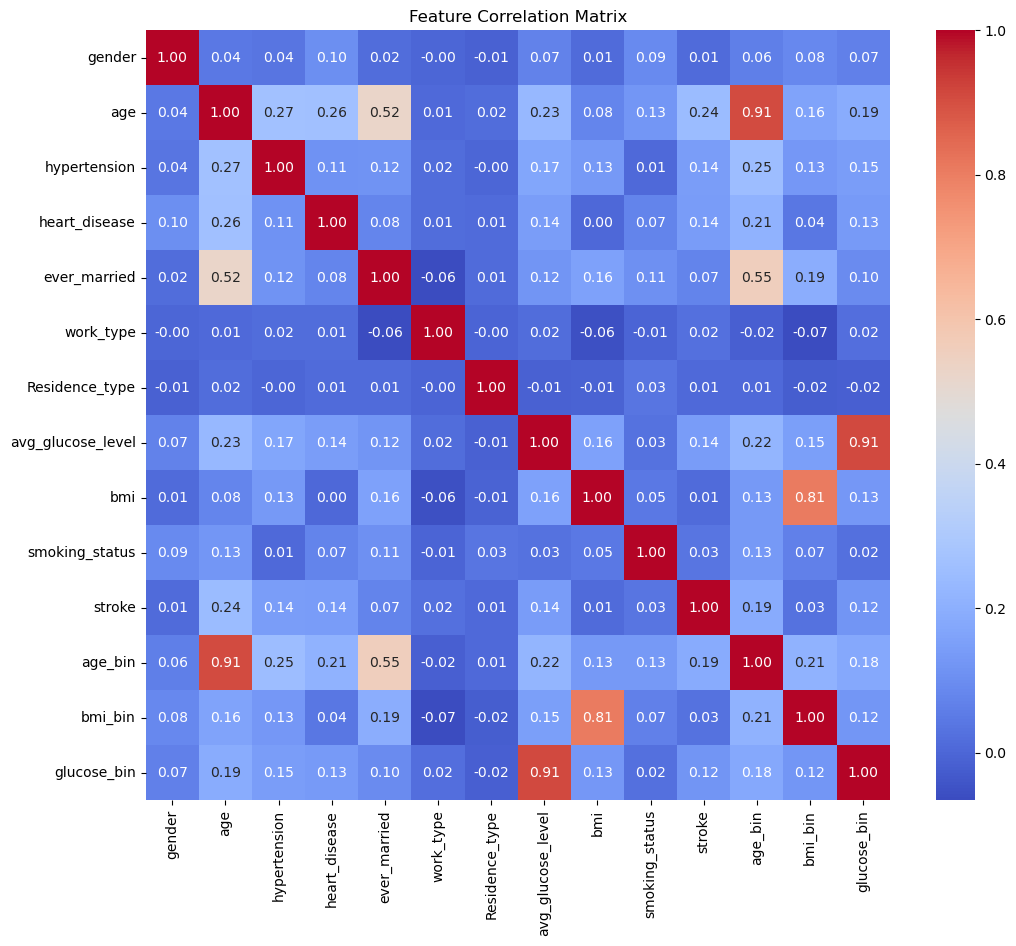

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
df.head()